# **Pronóstico de la temperatura promedio en la Ciudad de México utilizando SARIMAX**

#### Elaboró: Lic. Economía Ángel Sánchez Santana

## Introducción
El pronóstico de series de tiempo es una técnica esencial en análisis de datos para predecir valores futuros basados en observaciones pasadas. En este caso, utilizaremos el modelo **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) para predecir la temperatura promedio de la Ciudad de México.

El modelo SARIMAX es una extensión del modelo ARIMA que incorpora componentes estacionales y variables exógenas, lo que lo hace ideal para series de tiempo con patrones estacionales y dependencias externas.

---

## Metodología 

### La fórmula general del modelo SARIMAX es:

$$\Phi(L^s) \phi(L) (1 - L)^d (1 - L^s)^D y_t = \alpha X_t + \Theta(L^s) \theta(L) \epsilon_t$$

Donde:
- $\Phi(L^s)$ y $\phi(L)$ son los polinomios de rezagos de las partes AR estacional y no estacional, respectivamente.
- $\Theta(L^s)$ y $\theta(L)$ son los polinomios de rezagos de las partes MA estacional y no estacional, respectivamente.
- $(1 - L)^d$ y $(1 - L^s)^D$ son los componentes de diferenciación no estacional y estacional.
- $y_t$ es la serie temporal en el tiempo $t$.
- $X_t$ son las variables exógenas.
- $\alpha$ es el coeficiente asociado a las variables exógenas.
- $\epsilon_t$ es el término de error en el tiempo $t$.

### Componentes del Modelo SARIMAX

#### 1. Componente AR (AutoRegresivo - \(p\))
El componente AR modela la dependencia de la serie temporal con sus propios valores pasados. Matemáticamente, se expresa como: $\phi(L) (1 - L)^d y_t = c + \epsilon_t$

Donde:
- $\phi(L)$ es el polinomio de rezagos de la parte AR.
- $L$ es el operador de rezago $(L y_t = y_{t-1})$.
- $y_t$ es el valor de la serie en el tiempo $t$.
- $c$ es una constante.
- $\epsilon_t$ es el término de error en el tiempo $t$.

#### 2. Componente I (Integrado - \(d\))
El componente I representa el número de diferencias necesarias para hacer la serie temporal estacionaria. La diferenciación se expresa como: $(1 - L)^d y_t$

Donde $d$ es el orden de diferenciación.

#### 3. Componente MA (Media Móvil - \(q\))
El componente MA modela la dependencia de la serie temporal con los errores pasados. Se expresa como: $y_t = \mu + \theta(L) \epsilon_t$

Donde:
- $\theta(L)$ es el polinomio de rezagos de la parte MA.
- $\mu$ es la media de la serie.
- $\epsilon_t$ es el término de error en el tiempo $t$

#### 4. Componente Estacional (SARIMA - \(P, D, Q, s\))
El componente estacional modela patrones que se repiten en intervalos regulares. Se define mediante los parámetros $(P, D, Q, s)$, donde:
- $P$ es el orden AR estacional.
- $D$ es el orden de diferenciación estacional.
- $Q$ es el orden MA estacional.
- $s$ es la longitud del ciclo estacional.

La parte estacional se expresa como:   $\Phi(L^s) (1 - L^s)^D y_t = \Theta(L^s) \epsilon_t$

Donde:
- $\Phi(L^s)$ es el polinomio de rezagos de la parte AR estacional.
- $\Theta(L^s)$ es el polinomio de rezagos de la parte MA estacional.

#### 5. Variables Exógenas (X)
El modelo SARIMAX permite incorporar variables exógenas $X_t$ que pueden influir en la serie temporal. Estas variables se incluyen en el modelo de la siguiente manera:

$y_t = \alpha X_t + \phi(L) (1 - L)^d y_t + \theta(L) \epsilon_t$

Donde $\alpha$ es el coeficiente asociado a las variables exógenas.

---
### Caso de estudio y adaptación del modelo
El pronóstico de la temperatura promedio en una ciudad es una herramienta poderosa que puede aplicarse en múltiples sectores, desde la salud pública y la planificación urbana hasta el turismo y la gestión de recursos. Proporciona información valiosa para tomar decisiones informadas, optimizar operaciones y mejorar la calidad de vida de las personas. 
En este caso de estudio nuestra objetivo será recopilar y modelar datos del clima que tenemos disponible en la National Oceanic and Atmospheric Administration (NOAA).

### Proceso:
1. *Recopilación de Datos*
2. *Preprocesamiento de Datos* 
3. *Análisis Exploratorio de Datos (EDA)*
4. *Selección del Modelo*
5. *Entrenamiento del Modelo*
6. *Validación del Modelo*
7. *Generación de Predicciones*
8. *Presentación de Resultados*
   
#### Variables exogenas a testear:
- Season
- Mes del año
- Precipitacion promedio mensual
- Temperatura MAX promedio mensual 
- Temperatura MIN promedio mensual


**Fuente de datos: https://www.noaa.gov/**

In [652]:
# Manipulación y procesamiento de Datos
import numpy as np
import pandas as pd

# Plot - Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from matplotlib.dates import DateFormatter
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (18,6)

# Ocultar advertencia - Warning
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse

---

## *1.Recopilacion de datos*

In [653]:
Data = pd.read_csv("C:/Users/angsanch3/BI & Data Analitics/Py/Weather proyect/DataBaseFrom2000to2024.csv")
Data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303,07/01/2007,NaN,NaN,69,"H,,S",80.0,",,S",46.0,",,S"
1,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303,11/01/2007,0.0,",,S",64,"H,,S",NaN,NaN,NaN,NaN
2,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303,15/01/2007,NaN,NaN,66,"H,,S",NaN,NaN,NaN,NaN
3,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303,16/01/2007,0.0,",,S",67,"H,,S",76.0,",,S",49.0,",,S"
4,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303,17/01/2007,0.0,",,S",65,"H,,S",74.0,",,S",48.0,",,S"


## 2. *Preprocesamiento de Datos* 

In [654]:
Data['DATE'] = pd.to_datetime(Data['DATE'],format="%d/%m/%Y")
Data['YearMonth'] = Data['DATE'].dt.to_period('M')
Data['TAVG(Celsius)'] = (Data['TAVG'] - 32) * (5/9)                        
Data['TMAX(Celsius)'] = (Data['TMAX'] -32) * (5/9)
Data['TMIN(Celsius)'] = (Data['TMIN'] -32) * (5/9)
Data.drop(['TAVG','STATION','LATITUDE','LONGITUDE','ELEVATION','TMAX','TMIN','PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES'], axis=1, inplace=True)
Data['Month'] = Data['DATE'].dt.month
Data['Year'] = Data['DATE'].dt.year
Data['Day'] = Data['DATE'].dt.day   
Data['Fecha'] = Data['DATE'].dt.date
Data.head()

,NAME,DATE,PRCP,YearMonth,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Year,Day,Fecha
0,"MEXICO CITY, MX",2007-01-07,NaN,2007-01,20.555556,26.666667,7.777778,1,2007,7,2007-01-07
1,"MEXICO CITY, MX",2007-01-11,0.0,2007-01,17.777778,NaN,NaN,1,2007,11,2007-01-11
2,"MEXICO CITY, MX",2007-01-15,NaN,2007-01,18.888889,NaN,NaN,1,2007,15,2007-01-15
3,"MEXICO CITY, MX",2007-01-16,0.0,2007-01,19.444444,24.444444,9.444444,1,2007,16,2007-01-16
4,"MEXICO CITY, MX",2007-01-17,0.0,2007-01,18.333333,23.333333,8.888889,1,2007,17,2007-01-17


In [655]:

Data = Data.groupby('YearMonth').agg({
    'NAME': 'max', #Ciudad, todos es el mismo valor
    'PRCP': 'mean',  # Promedio de la precipitación
    'TAVG(Celsius)': 'mean',  # Promedio de la temperatura promedio
    'TMAX(Celsius)': 'mean',  # Promedio de la temperatura máxima
    'TMIN(Celsius)': 'mean',   # Promedio de la temperatura mínima
    'Month' : 'max'
}).reset_index()
Data.set_index('YearMonth', inplace=True)
Data.head()

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month
YearMonth,,,,,,
2007-01,"MEXICO CITY, MX",0.000000,18.000000,24.012346,8.765432,1
2007-02,"MEXICO CITY, MX",0.002500,18.000000,24.444444,8.444444,2
2007-03,"MEXICO CITY, MX",0.000000,20.648148,25.972222,10.416667,3
2007-04,"MEXICO CITY, MX",0.251429,21.150794,25.069444,11.527778,4
2007-05,"MEXICO CITY, MX",0.134286,21.313131,26.777778,12.703704,5


In [656]:
# Crear una función para mapear la temporada
def obtener_temporada(mes):
    # Definir las temporadas en base al mes
    if mes >= 3 and mes < 6:
        return 2  # Primavera
    elif mes >= 6 and mes < 9:
        return 3   # Verano
    elif mes >= 9 and mes < 12:
        return 4  # Otoño
    else:
        return 1  # Invierno (para enero, febrero, diciembre)
    
# Aplicar la función
Data['Season'] = Data['Month'].apply(obtener_temporada)
Data.tail()


,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season
YearMonth,,,,,,,
2024-09,"MEXICO CITY, MX",0.212500,18.592593,25.784314,14.313725,9,4
2024-10,"MEXICO CITY, MX",0.000769,16.451613,24.135802,11.327160,10,4
2024-11,"MEXICO CITY, MX",0.005000,17.692308,25.760234,10.614035,11,4
2024-12,"MEXICO CITY, MX",0.000000,16.240741,24.298246,8.538012,12,1
2025-01,"MEXICO CITY, MX",0.001923,16.762452,24.736842,9.561404,1,1


In [657]:
nulos_por_columna = Data.isnull().sum()
print(nulos_por_columna)

NAME             0
PRCP             1
TAVG(Celsius)    0
TMAX(Celsius)    1
TMIN(Celsius)    1
Month            0
Season           0
dtype: int64


In [658]:
Data = Data.dropna()

## 3. *Análisis Exploratorio de Datos (EDA)*

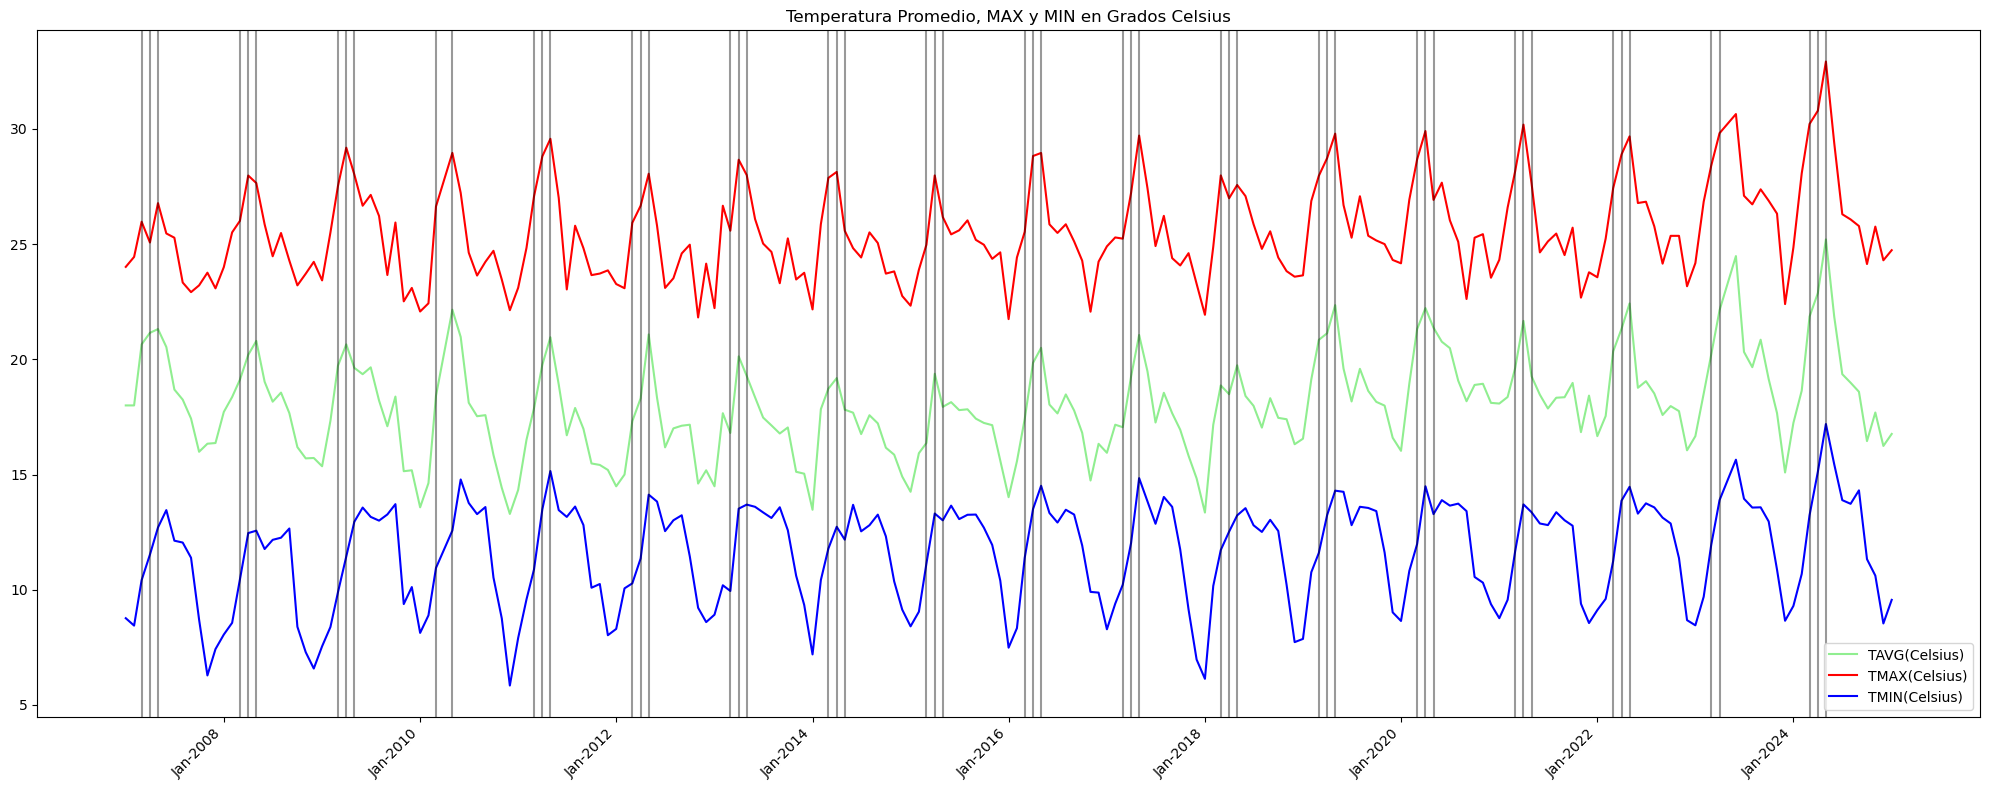

In [659]:
#Graficamos para ver como se comporta nuestra serie, resaltando los meses en los que es primavera, donde deveriamos ver las temperaturas más altas de nuestra serie
Data.index = pd.to_datetime(Data.index.astype(str)) 
plt.figure(figsize=(20,8))
plt.title('Temperatura Promedio, MAX y MIN en Grados Celsius')
plt.plot(Data.index, Data ['TAVG(Celsius)'], label = 'TAVG(Celsius)', color = 'lightgreen')
plt.plot(Data.index, Data ['TMAX(Celsius)'], label = 'TMAX(Celsius)', color = 'red')
plt.plot(Data.index, Data ['TMIN(Celsius)'], label = 'TMIN(Celsius)', color = 'blue')
plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%Y')) 

# Mostrar las etiquetas de los puntos en la gráfica
#for i in range(len(Data)): 
 #   plt.text(Data.index[i], 
  #           Data['TAVG(Celsius)'].iloc[i], 
  #           f'{Data["TAVG(Celsius)"].iloc[i]:.2f}', 
  #           fontsize=9, color='black', ha='right', va='bottom')
  #  plt.text(Data.index[i], 
  #           Data['TMAX(Celsius)'].iloc[i], 
  #           f'{Data["TMAX(Celsius)"].iloc[i]:.2f}', 
  #           fontsize=9, color='black', ha='right', va='bottom')
  #
  #    plt.text(Data.index[i], 
  #             Data['TMIN(Celsius)'].iloc[i], 
  #             f'{Data["TMIN(Celsius)"].iloc[i]:.2f}', 
   #            fontsize=9, color='black', ha='right', va='bottom')
    
# Hacemos visible con una linea gris los meses en los que es primavera, o sea season == 2    
for i in Data[Data['Season']==2].index:
    plt.axvline(x=i,color='k',alpha=0.4)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.legend()
plt.show()

### Un vistazo más a las series por separado

C:\Users\angsanch3\AppData\Local\Temp\ipykernel_13508\638106704.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(Data, x=Data.index, y='TAVG(Celsius)', label="Temperatura promedio", linestyle="--", linewidth=2, ax=axes[0,1], palette="Set2")
C:\Users\angsanch3\AppData\Local\Temp\ipykernel_13508\638106704.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(Data, x=Data.index, y='TMAX(Celsius)', label="Temperatura Max", linestyle="--", linewidth=2, ax=axes[1,0], palette="Set2")
C:\Users\angsanch3\AppData\Local\Temp\ipykernel_13508\638106704.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(Data, x=Data.index, y='TMIN(Celsius)', label="Temperatura Min", linestyle="--", linewidth=2, ax=axes[1,1], palette="Set2")


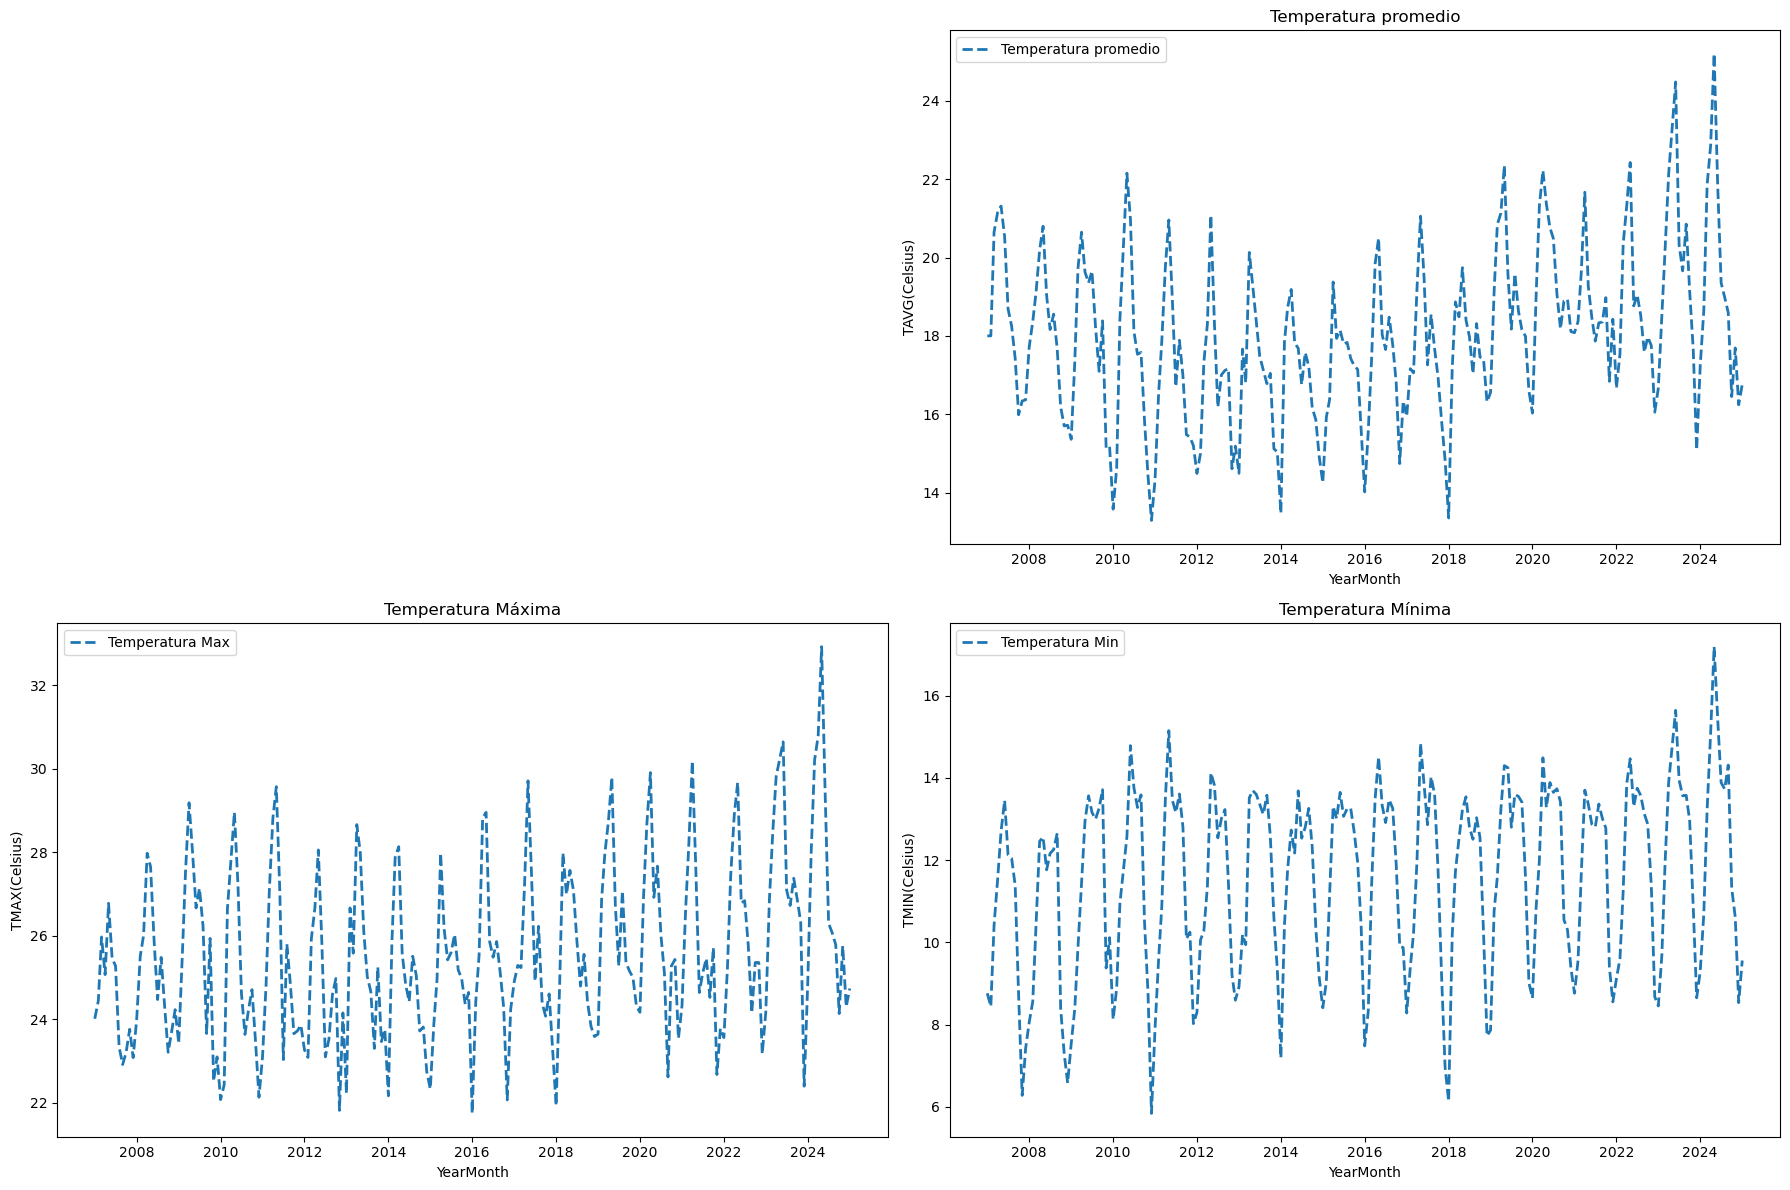

In [660]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.lineplot(Data, x=Data.index, y='TAVG(Celsius)', label="Temperatura promedio", linestyle="--", linewidth=2, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Temperatura promedio")
sns.lineplot(Data, x=Data.index, y='TMAX(Celsius)', label="Temperatura Max", linestyle="--", linewidth=2, ax=axes[1,0], palette="Set2")
axes[1,0].set_title("Temperatura Máxima")
sns.lineplot(Data, x=Data.index, y='TMIN(Celsius)', label="Temperatura Min", linestyle="--", linewidth=2, ax=axes[1,1], palette="Set2")
axes[1,1].set_title("Temperatura Mínima")

# Eliminamos el gráfico vacío (axes[0,0])
fig.delaxes(axes[0,0])

plt.tight_layout()
plt.show()


#### Despues de este vistazo corroboramos la correlación visual de nuestras 3 series

### Ahora veamos como se comportan nuestros datos descompuestos en error, trend and seasonality 

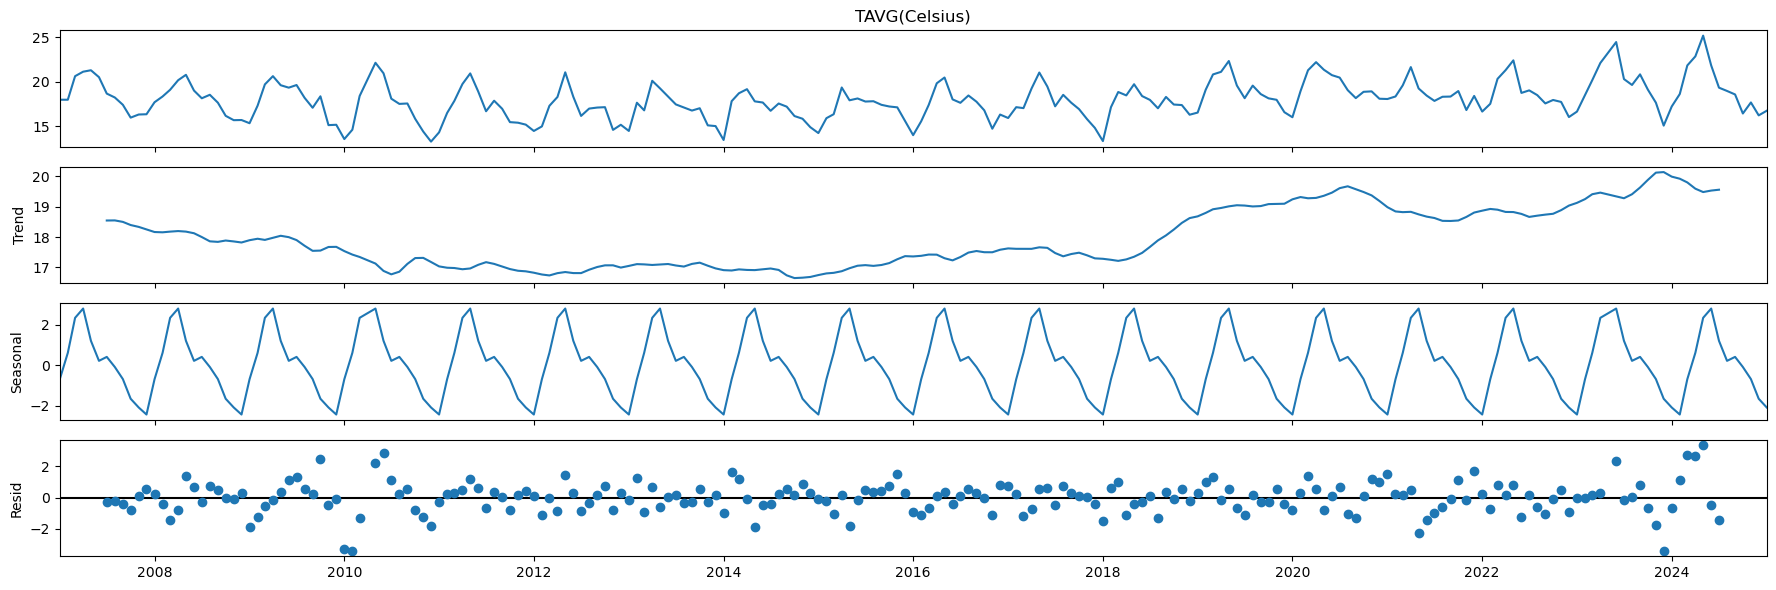

In [661]:
# Descomposición estacional
Decomposition = seasonal_decompose(Data['TAVG(Celsius)'], model='additive', period=12)
Decomposition.plot();

### Comprobamos la estacionaridad visual con la prueba Dickey Fuller 

In [662]:
Comprobacion = adfuller(Data['TAVG(Celsius)'])
print('Estadístico ADF:', Comprobacion[0])
print('Valor p:', Comprobacion[1])
print('Valor crítico (1%):', Comprobacion[4]['1%'])
print('Valor crítico (5%):', Comprobacion[4]['5%'])
print('Valor crítico (10%):', Comprobacion[4]['10%'])

Estadístico ADF: -0.5851625163089582
Valor p: 0.8742995675713072
Valor crítico (1%): -3.462980134086401
Valor crítico (5%): -2.875885461947131
Valor crítico (10%): -2.5744164898444515


## No podemos rechazar la hipótesis nula del estadistico P, puesto que el valor P es mayor a 5%, por lo que deducimos que:
## **Los datos tienen raíz unitaria y NO son estacionarios**

## Para estacionalizar nuestra serie utilizaremos el **metodo de diferenciacion**, como tratamos con una serie de tiempo con tendencia anual, diferenciaremos a 12 meses, es decir cada mes con el mismo del año anterior.

In [663]:
# Diferenciación estacional: diferenciar el valor del mes con respecto al mismo mes del año anterior
Data['TAVG(dif)'] = Data['TAVG(Celsius)'].diff(12)
Data['TMAX(dif)'] = Data['TMAX(Celsius)'].diff(12)
Data['TMIN(dif)'] = Data['TMIN(Celsius)'].diff(12)
Data = Data.dropna()
Data.head(24)

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season,TAVG(dif),TMAX(dif),TMIN(dif)
YearMonth,,,,,,,,,,
2008-01-01,"MEXICO CITY, MX",0.000000,17.716049,24.000000,8.055556,1,1,-0.283951,-1.234568e-02,-0.709877
2008-02-01,"MEXICO CITY, MX",0.003750,18.364198,25.509259,8.564815,2,1,0.364198,1.064815e+00,0.120370
2008-03-01,"MEXICO CITY, MX",0.000000,19.117647,26.010101,10.454545,3,2,-1.530501,3.787879e-02,0.037879
2008-04-01,"MEXICO CITY, MX",0.031250,20.194444,27.976190,12.460317,4,2,-0.956349,2.906746e+00,0.932540
2008-05-01,"MEXICO CITY, MX",0.003636,20.798611,27.649573,12.564103,5,2,-0.514520,8.717949e-01,-0.139601
2008-06-01,"MEXICO CITY, MX",0.021538,19.027778,25.858586,11.767677,6,3,-1.507202,3.956229e-01,-1.689113
2008-07-01,"MEXICO CITY, MX",0.115625,18.162393,24.472222,12.166667,7,3,-0.526496,-8.055556e-01,0.037037
2008-08-01,"MEXICO CITY, MX",0.123077,18.555556,25.481481,12.259259,8,3,0.304527,2.148148e+00,0.210648
2008-09-01,"MEXICO CITY, MX",0.015385,17.666667,24.285714,12.658730,9,4,0.236111,1.369048e+00,1.269841


## Volvemos a aplicar la prueba Dickey Fuller

In [664]:
#Revisamos si la serie quedo estacionarizada o no 
Comprobacion2 = adfuller(Data['TAVG(dif)'])
print('Estadístico ADF:', Comprobacion2[0])
print('Valor p:', Comprobacion2[1])
print('Valor crítico (1%):', Comprobacion2[4]['1%'])
print('Valor crítico (5%):', Comprobacion2[4]['5%'])
print('Valor crítico (10%):', Comprobacion2[4]['10%'])

Estadístico ADF: -3.764088044613786
Valor p: 0.0032968693227080413
Valor crítico (1%): -3.4652439354133255
Valor crítico (5%): -2.8768752281673717
Valor crítico (10%): -2.574944653739612


#### Ahora si rechazamos la hipotesis nula del estadistico P por lo que deducimos que nuestra serie no tiene raiz unitaria y es estacionaria
#### Lo siguiente es modelar y seguir trabajando con nuestra serie diferenciada. 

## 4. *Selección del Modelo*

#### Buscamos el valor ideal de (p,q,d)(P,D,Q)

In [665]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de anáisis de Serie de Tiempo\n Dickey-Fuller: p={0:.9f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

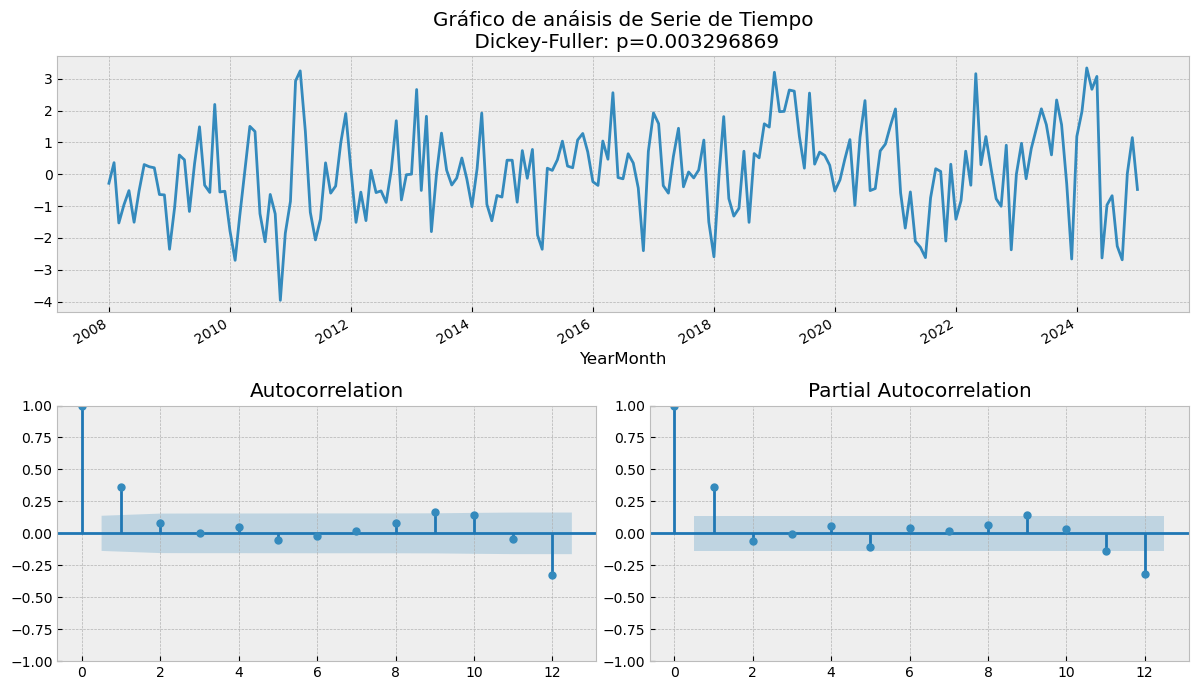

In [666]:
tsplot(Data['TAVG(dif)'], lags = 12);

# Nos apoyamos de la funcion pmdarima para obtener un calculo optimizado de los mejores valores

In [667]:
auto_arima(Data['TAVG(dif)'], test='adf',
           seasonal=True, m=12,
           trace=True,
           error_action='ignore',
           suppress_warnings=True,
           stepwise=True
           #max_p=3,   # Limitar el valor máximo de p
           #max_q=3,   # Limitar el valor máximo de q
           #max_P=1,   # Limitar el valor máximo de P
           #max_Q=1,   # Limitar el valor máximo de Q
           #max_order=5)
            )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=633.733, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=711.144, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=648.516, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=642.682, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=709.503, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=632.747, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=687.119, Time=0.19 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=633.918, Time=1.37 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=653.103, Time=0.35 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=635.497, Time=1.79 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=626.730, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=685.318, Time=0.11 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=628.108, Time=0.73 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=628.114, Time=1.18 sec
 ARIMA(1,0,2)(1,0,0)[12] intercep

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

## Dividimos nuestras series para verificar el ajuste de nuestro modelo con los valores reales 

In [668]:
len(Data)

203

### Al tener una serie de 203 meses, utilizaremos los primeros 179 como datos reales y trataremos de que nuestro modelo prediga los 24 valores ultimos

In [669]:
train = Data.iloc[:179]
test = Data.iloc[179:]
train.shape, test.shape

((179, 10), (24, 10))

In [670]:
test

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season,TAVG(dif),TMAX(dif),TMIN(dif)
YearMonth,,,,,,,,,,
2023-01-01,"MEXICO CITY, MX",0.000000,16.666667,24.176955,8.456790,1,1,0.000000,0.614863,-0.660857
2023-02-01,"MEXICO CITY, MX",0.000000,18.511905,26.843434,9.696970,2,1,0.972222,1.605339,0.093795
2023-03-01,"MEXICO CITY, MX",0.025714,20.203704,28.402778,11.944444,3,2,-0.141124,0.972222,0.694444
2023-04-01,"MEXICO CITY, MX",0.008182,22.129630,29.814815,13.888889,4,2,0.807791,0.925926,0.024155
2023-06-01,"MEXICO CITY, MX",0.067778,24.481481,30.644444,15.644444,6,3,2.055556,0.968519,1.176852
2023-07-01,"MEXICO CITY, MX",0.091176,20.322581,27.098765,13.950617,7,3,1.557149,0.315140,0.646524
2023-08-01,"MEXICO CITY, MX",0.100333,19.659498,26.725146,13.567251,8,3,0.608572,-0.115132,-0.182749
2023-09-01,"MEXICO CITY, MX",0.087667,20.851852,27.377778,13.577778,9,4,2.333333,1.604831,0.002899
2023-10-01,"MEXICO CITY, MX",0.022759,19.139785,26.882716,12.962963,10,4,1.555244,2.730669,-0.165692


## 5. *Entrenamiento del Modelo*

### Corremos nuestro primer modelo con los valores que nos recomendo la funcion pmdarima:  ARIMA(2,0,1)(0,0,1)[12]          

In [671]:
model1 = SARIMAX(train['TAVG(dif)'],order=(2,0,1),seasonal_order=(0,0,1,12), enforce_invertibility=False)
result1 = model1.fit()
result1.summary()

c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          TAVG(dif)   No. Observations:                  179
Model:             SARIMAX(2, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -259.931
Date:                            Tue, 18 Feb 2025   AIC                            529.862
Time:                                    08:57:49   BIC                            545.799
Sample:                                         0   HQIC                           536.324
                                            - 179                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2931      0.102     12.673      0.000       1.093       1.493
ar.L2         -0.3045      0.096     -3.168      0.002      -0.493      -0.116
ma.L1         -0.8966      0.060    -14.895      0.000      -1.015      -0.779
ma.S.L12      -0.7830      0.066    -11.854      0.000      -0.912      -0.654
sigma2         1.0062      0.109      9.223      0.000       0.792       1.220
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.81   Prob(JB):                         0.96
Heteroskedasticity (H):               1.02   Skew:                            -0.05
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Obtenemos los valores predichos para este primer modelo y comparamos con los datos reales.

In [672]:
start = len(train.index)
end = len(train.index) + len(test.index) -1
pred1 = result1.predict(start = start,end = end,dynamic = False).rename('SARIMA(2,0,1)(0,0,1)[12]')
pred1

c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


179   -0.672073
180    0.365682
181   -0.697502
182   -0.331872
183   -1.305563
184    0.590158
185   -0.334794
186    0.186955
187    0.646351
188    0.213252
189   -0.323354
190    0.807189
191    0.257590
192    0.087325
193    0.034492
194    0.018014
195    0.012793
196    0.011058
197    0.010404
198    0.010087
199    0.009876
200    0.009700
201    0.009537
202    0.009379
Name: SARIMA(2,0,1)(0,0,1)[12], dtype: float64

In [673]:
# Asignar nuevo índice como fechas
new_index = pd.date_range(start='2023-01-01', periods=24, freq='MS')
pred1.index = pd.to_datetime(new_index) 
pred1

2023-01-01   -0.672073
2023-02-01    0.365682
2023-03-01   -0.697502
2023-04-01   -0.331872
2023-05-01   -1.305563
2023-06-01    0.590158
2023-07-01   -0.334794
2023-08-01    0.186955
2023-09-01    0.646351
2023-10-01    0.213252
2023-11-01   -0.323354
2023-12-01    0.807189
2024-01-01    0.257590
2024-02-01    0.087325
2024-03-01    0.034492
2024-04-01    0.018014
2024-05-01    0.012793
2024-06-01    0.011058
2024-07-01    0.010404
2024-08-01    0.010087
2024-09-01    0.009876
2024-10-01    0.009700
2024-11-01    0.009537
2024-12-01    0.009379
Freq: MS, Name: SARIMA(2,0,1)(0,0,1)[12], dtype: float64

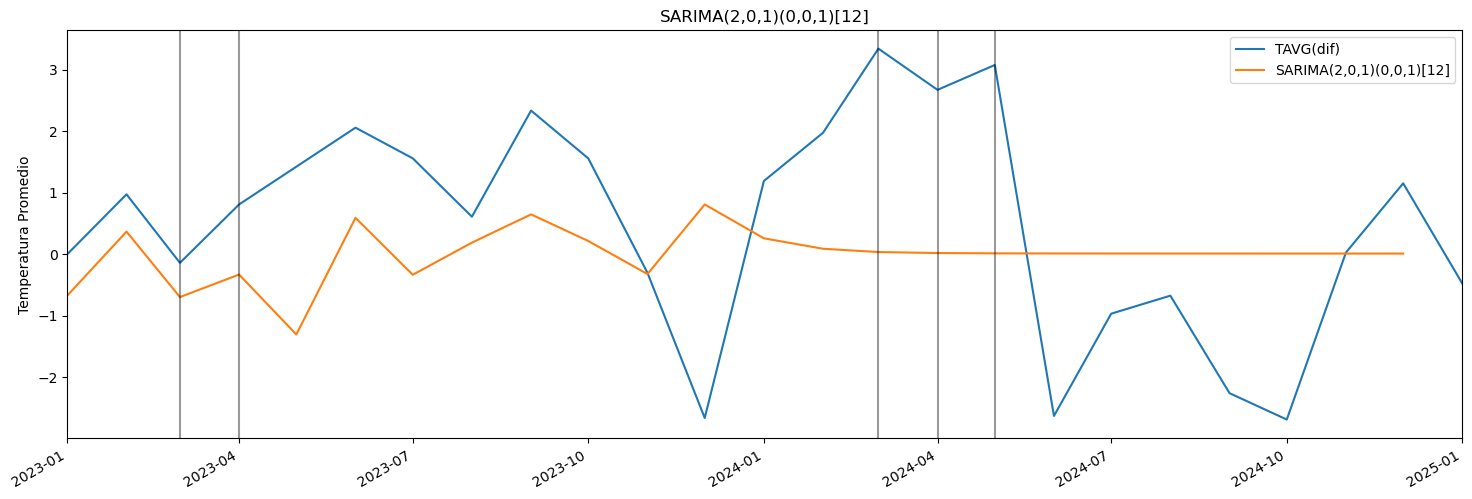

In [674]:
title = 'SARIMA(2,0,1)(0,0,1)[12]'
ylabel = 'Temperatura Promedio'
xlabel = ''

ax = test['TAVG(dif)'].plot(legend=True,title=title)
pred1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for i in test[test['Season']==2].index:
    plt.axvline(x=i,color='k',alpha=0.4)


In [675]:
test.head()

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season,TAVG(dif),TMAX(dif),TMIN(dif)
YearMonth,,,,,,,,,,
2023-01-01,"MEXICO CITY, MX",0.000000,16.666667,24.176955,8.456790,1,1,0.000000,0.614863,-0.660857
2023-02-01,"MEXICO CITY, MX",0.000000,18.511905,26.843434,9.696970,2,1,0.972222,1.605339,0.093795
2023-03-01,"MEXICO CITY, MX",0.025714,20.203704,28.402778,11.944444,3,2,-0.141124,0.972222,0.694444
2023-04-01,"MEXICO CITY, MX",0.008182,22.129630,29.814815,13.888889,4,2,0.807791,0.925926,0.024155
2023-06-01,"MEXICO CITY, MX",0.067778,24.481481,30.644444,15.644444,6,3,2.055556,0.968519,1.176852


In [676]:

mse_error = mse(test['TAVG(dif)'], pred1)
rmse_error = rmse(test['TAVG(dif)'],pred1)

print(f'SARIMA(2,0,1)(0,0,1)[12] MSE Error: {mse_error:11.10}')
print(f'SARIMA(2,0,1)(0,0,1)[12] RMSE Error: {rmse_error:11.10}')

SARIMA(2,0,1)(0,0,1)[12] MSE Error: 3.294110759
SARIMA(2,0,1)(0,0,1)[12] RMSE Error: 1.814968528


# En esta parte es importante que se testeen todos los modelos posibles antes de escojer el ideal. 
## sin embargo solo se muestra el modelo final para fines practicos.  
## Ya que testeamos este primer modelo y ver que no se acerca mucho a la readlidad probamos agregando variables exogenas para mejorar el ajuste. 

In [677]:
test.head()

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season,TAVG(dif),TMAX(dif),TMIN(dif)
YearMonth,,,,,,,,,,
2023-01-01,"MEXICO CITY, MX",0.000000,16.666667,24.176955,8.456790,1,1,0.000000,0.614863,-0.660857
2023-02-01,"MEXICO CITY, MX",0.000000,18.511905,26.843434,9.696970,2,1,0.972222,1.605339,0.093795
2023-03-01,"MEXICO CITY, MX",0.025714,20.203704,28.402778,11.944444,3,2,-0.141124,0.972222,0.694444
2023-04-01,"MEXICO CITY, MX",0.008182,22.129630,29.814815,13.888889,4,2,0.807791,0.925926,0.024155
2023-06-01,"MEXICO CITY, MX",0.067778,24.481481,30.644444,15.644444,6,3,2.055556,0.968519,1.176852


In [678]:
model2 = SARIMAX(train['TAVG(dif)'],exog = train[['PRCP','TMAX(dif)','TMIN(dif)']],order = (2,0,1),seasonal_order = (0,0,1,12),enforce_invertibility = False)
result2 = model2.fit()
result2.summary()

c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          TAVG(dif)   No. Observations:                  179
Model:             SARIMAX(2, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -150.121
Date:                            Tue, 18 Feb 2025   AIC                            316.242
Time:                                    08:57:51   BIC                            341.742
Sample:                                         0   HQIC                           326.582
                                            - 179                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PRCP          -0.4002      0.200     -2.005      0.045      -0.791      -0.009
TMAX(dif)      0.5500      0.037     14.996      0.000       0.478       0.622
TMIN(dif)      0.3200      0.052      6.170      0.000       0.218       0.422
ar.L1          1.2098      0.138      8.762      0.000       0.939       1.480
ar.L2         -0.2218      0.130     -1.709      0.087      -0.476       0.032
ma.L1         -0.7188      0.099     -7.280      0.000      -0.912      -0.525
ma.S.L12      -0.8632      0.099     -8.739      0.000      -1.057      -0.670
sigma2         0.2869      0.032      9.027      0.000       0.225       0.349
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 6.93
Prob(Q):                              0.74   Prob(JB):                         0.03
Heteroskedasticity (H):               1.25   Skew:                             0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [679]:
start = len(train.index)
end = len(train.index) + len(test.index) -1
Exog1 = test[['PRCP','TMAX(dif)','TMIN(dif)']] 
pred2 = result2.predict(start = start , end = end, exog = Exog1).rename('SARIMAX 3 EXOGENAS (2,0,1)(0,0,1)[12]')
pred2

c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


179   -0.402795
180    0.743072
181   -0.296910
182    0.097515
183    0.144031
184    0.572741
185   -0.189774
186    0.630287
187    1.313336
188    0.054291
189   -2.332035
190    1.206388
191    2.873732
192    2.988233
193    2.329300
194    2.748859
195   -0.778545
196   -0.496031
197   -0.388482
198   -0.724339
199   -2.032927
200   -0.392631
201    1.009579
202    0.020683
Name: SARIMAX 3 EXOGENAS (2,0,1)(0,0,1)[12], dtype: float64

In [680]:
# Asignar nuevo índice como fechas de tipo string
new_index = pd.date_range(start='2023-01-01', periods=24, freq='MS')
pred2.index = pd.to_datetime(new_index) 
pred2

2023-01-01   -0.402795
2023-02-01    0.743072
2023-03-01   -0.296910
2023-04-01    0.097515
2023-05-01    0.144031
2023-06-01    0.572741
2023-07-01   -0.189774
2023-08-01    0.630287
2023-09-01    1.313336
2023-10-01    0.054291
2023-11-01   -2.332035
2023-12-01    1.206388
2024-01-01    2.873732
2024-02-01    2.988233
2024-03-01    2.329300
2024-04-01    2.748859
2024-05-01   -0.778545
2024-06-01   -0.496031
2024-07-01   -0.388482
2024-08-01   -0.724339
2024-09-01   -2.032927
2024-10-01   -0.392631
2024-11-01    1.009579
2024-12-01    0.020683
Freq: MS, Name: SARIMAX 3 EXOGENAS (2,0,1)(0,0,1)[12], dtype: float64

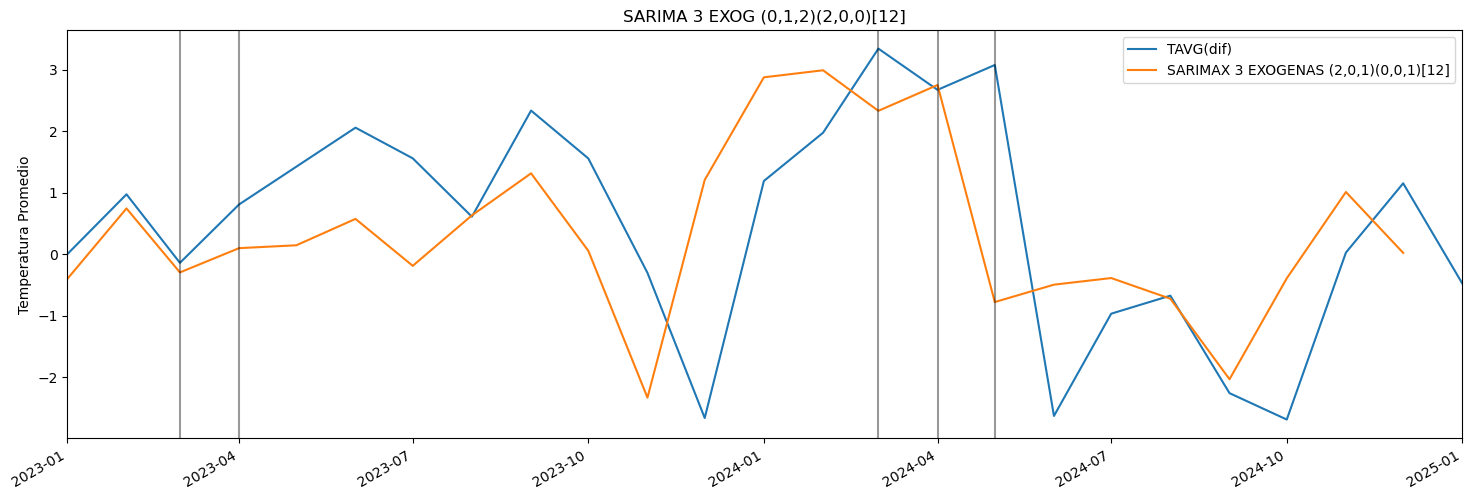

In [681]:
title = 'SARIMA 3 EXOG (0,1,2)(2,0,0)[12]'
ylabel = 'Temperatura Promedio'
xlabel = ''

ax = test['TAVG(dif)'].plot(legend=True,title=title)
pred2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for i in test[test['Season']==2].index:
    plt.axvline(x=i,color='k',alpha=0.4)

In [682]:
test

,NAME,PRCP,TAVG(Celsius),TMAX(Celsius),TMIN(Celsius),Month,Season,TAVG(dif),TMAX(dif),TMIN(dif)
YearMonth,,,,,,,,,,
2023-01-01,"MEXICO CITY, MX",0.000000,16.666667,24.176955,8.456790,1,1,0.000000,0.614863,-0.660857
2023-02-01,"MEXICO CITY, MX",0.000000,18.511905,26.843434,9.696970,2,1,0.972222,1.605339,0.093795
2023-03-01,"MEXICO CITY, MX",0.025714,20.203704,28.402778,11.944444,3,2,-0.141124,0.972222,0.694444
2023-04-01,"MEXICO CITY, MX",0.008182,22.129630,29.814815,13.888889,4,2,0.807791,0.925926,0.024155
2023-06-01,"MEXICO CITY, MX",0.067778,24.481481,30.644444,15.644444,6,3,2.055556,0.968519,1.176852
2023-07-01,"MEXICO CITY, MX",0.091176,20.322581,27.098765,13.950617,7,3,1.557149,0.315140,0.646524
2023-08-01,"MEXICO CITY, MX",0.100333,19.659498,26.725146,13.567251,8,3,0.608572,-0.115132,-0.182749
2023-09-01,"MEXICO CITY, MX",0.087667,20.851852,27.377778,13.577778,9,4,2.333333,1.604831,0.002899
2023-10-01,"MEXICO CITY, MX",0.022759,19.139785,26.882716,12.962963,10,4,1.555244,2.730669,-0.165692


In [683]:
pred2

2023-01-01   -0.402795
2023-02-01    0.743072
2023-03-01   -0.296910
2023-04-01    0.097515
2023-05-01    0.144031
2023-06-01    0.572741
2023-07-01   -0.189774
2023-08-01    0.630287
2023-09-01    1.313336
2023-10-01    0.054291
2023-11-01   -2.332035
2023-12-01    1.206388
2024-01-01    2.873732
2024-02-01    2.988233
2024-03-01    2.329300
2024-04-01    2.748859
2024-05-01   -0.778545
2024-06-01   -0.496031
2024-07-01   -0.388482
2024-08-01   -0.724339
2024-09-01   -2.032927
2024-10-01   -0.392631
2024-11-01    1.009579
2024-12-01    0.020683
Freq: MS, Name: SARIMAX 3 EXOGENAS (2,0,1)(0,0,1)[12], dtype: float64

## 6. *Validación del Modelo*

### Calculamos El MAPE (Mean Absolute Percentage Error, o Error Porcentual Absoluto Promedio)

In [684]:
MAPE = (abs(test['TAVG(dif)'] / pred2)).mean()
MAPE

5.886105089607961

In [685]:
Ajuste = -MAPE + 100
Ajuste

94.11389491039203

In [686]:
mse_error = mse(test['TAVG(dif)'], pred2)
rmse_error = rmse(test['TAVG(dif)'],pred2)

print(f'SARIMAX(2,0,1)(0,0,1)[12] MSE Error: {mse_error:11.10}')
print(f'SARIMAX(2,0,1)(0,0,1)[12] RMSE Error: {rmse_error:11.10}')

SARIMAX(2,0,1)(0,0,1)[12] MSE Error: 0.7215786653
SARIMAX(2,0,1)(0,0,1)[12] RMSE Error: 0.8494578655


# 7. *Generación de Predicciones*

## **En este punto podemos decir que tenemos un modelo con tres variables exogenas que logran predecir los datos reales con un 94% de efectividad.**

In [687]:
# Obtener las predicciones y los intervalos de predicción
Exog1 = test[['PRCP','TMAX(dif)','TMIN(dif)']] 
forecast = result2.get_forecast(steps=len(Exog1), exog=Exog1)
predicciones = forecast.predicted_mean

new_index = pd.date_range(start='2025-01-01', periods=24, freq='MS')
predicciones.index = pd.to_datetime(new_index) 
predicciones

c:\Users\angsanch3\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2025-01-01   -0.402795
2025-02-01    0.743072
2025-03-01   -0.296910
2025-04-01    0.097515
2025-05-01    0.144031
2025-06-01    0.572741
2025-07-01   -0.189774
2025-08-01    0.630287
2025-09-01    1.313336
2025-10-01    0.054291
2025-11-01   -2.332035
2025-12-01    1.206388
2026-01-01    2.873732
2026-02-01    2.988233
2026-03-01    2.329300
2026-04-01    2.748859
2026-05-01   -0.778545
2026-06-01   -0.496031
2026-07-01   -0.388482
2026-08-01   -0.724339
2026-09-01   -2.032927
2026-10-01   -0.392631
2026-11-01    1.009579
2026-12-01    0.020683
Freq: MS, Name: predicted_mean, dtype: float64

In [688]:
# intervalos de predicciones
intervalos = forecast.conf_int()
new_index = pd.date_range(start='2025-01-01', periods=24, freq='MS')

intervalos.index = pd.to_datetime(new_index) 
intervalos


,lower TAVG(dif),upper TAVG(dif)
2025-01-01,-1.454079,0.648490
2025-02-01,-0.427750,1.913894
2025-03-01,-1.531226,0.937406
2025-04-01,-1.187767,1.382797
2025-05-01,-1.187218,1.475280
2025-06-01,-0.801247,1.946729
2025-07-01,-1.603867,1.224320
2025-08-01,-0.821590,2.082164
2025-09-01,-0.174227,2.800899
2025-10-01,-1.467045,1.575627


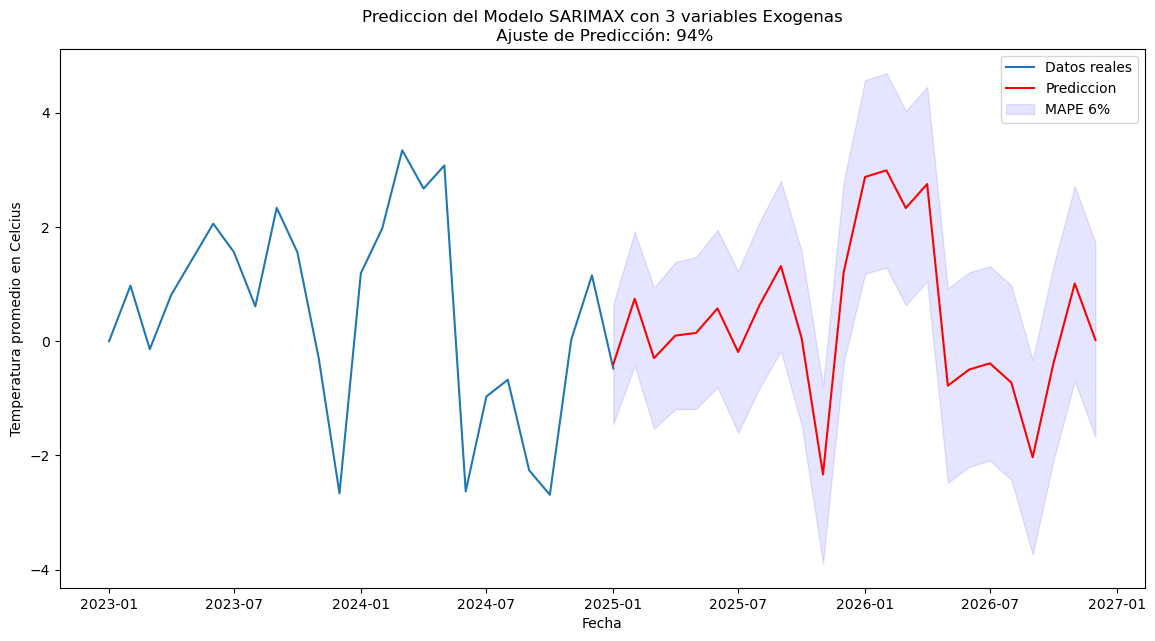

In [689]:
# Graficar las predicciones y los intervalos de predicción
plt.figure(figsize=(14, 7))
plt.plot(Data['TAVG(dif)'].tail(24), label='Datos reales')
plt.plot(predicciones, color='r', label='Prediccion')
plt.fill_between(intervalos.index, intervalos.iloc[:, 0], intervalos.iloc[:, 1], color='blue', alpha=0.10, label='MAPE 6%')
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio en Celcius')
plt.title('Prediccion del Modelo SARIMAX con 3 variables Exogenas\n Ajuste de Predicción: 94%')
plt.legend()
plt.show()

# Ya que hayamos encontrado nuestros valores futuros, es momento de transformar la data a data legible, es decir revertir la descomposicion que hicimos al diferenciar nuestra serie con respecto a 12 meses atras.

In [690]:
test = test['TAVG(Celsius)']
test


YearMonth
2023-01-01    16.666667
2023-02-01    18.511905
2023-03-01    20.203704
2023-04-01    22.129630
2023-06-01    24.481481
2023-07-01    20.322581
2023-08-01    19.659498
2023-09-01    20.851852
2023-10-01    19.139785
2023-11-01    17.666667
2023-12-01    15.089606
2024-01-01    17.240741
2024-02-01    18.639847
2024-03-01    21.851852
2024-04-01    22.873563
2024-05-01    25.203704
2024-06-01    21.851852
2024-07-01    19.354839
2024-08-01    18.984674
2024-09-01    18.592593
2024-10-01    16.451613
2024-11-01    17.692308
2024-12-01    16.240741
2025-01-01    16.762452
Name: TAVG(Celsius), dtype: float64

In [691]:
predicciones

Resultados = pd.DataFrame({'TAVG(celsius)': test, 'predicted_mean': predicciones})
Resultados.head()

,TAVG(celsius),predicted_mean
2023-01-01,16.666667,NaN
2023-02-01,18.511905,NaN
2023-03-01,20.203704,NaN
2023-04-01,22.129630,NaN
2023-06-01,24.481481,NaN


# 8. *Presentación de Resultados*

In [692]:
Resultados['TAVG(integrada)'] = Resultados['TAVG(celsius)'].copy()


In [693]:
Resultados.sort_index(inplace=True)

# Crear una nueva columna para almacenar los valores integrados
Resultados['predicted_mean_integrated'] = np.nan

for i in range(12, len(Resultados)):  
    if pd.notna(Resultados.iloc[i]['predicted_mean']):
        
        value_real_12_months_ago = Resultados.iloc[i - 12]['TAVG(celsius)']
        
        Resultados.iloc[i, Resultados.columns.get_loc('predicted_mean_integrated')] = Resultados.iloc[i]['predicted_mean'] + value_real_12_months_ago

Resultados.tail(24)


,TAVG(celsius),predicted_mean,TAVG(integrada),predicted_mean_integrated
2025-01-01,16.762452,-0.402795,16.762452,16.837946
2025-02-01,NaN,0.743072,NaN,19.382918
2025-03-01,NaN,-0.296910,NaN,21.554942
2025-04-01,NaN,0.097515,NaN,22.971078
2025-05-01,NaN,0.144031,NaN,25.347735
2025-06-01,NaN,0.572741,NaN,22.424593
2025-07-01,NaN,-0.189774,NaN,19.165065
2025-08-01,NaN,0.630287,NaN,19.614961
2025-09-01,NaN,1.313336,NaN,19.905929
2025-10-01,NaN,0.054291,NaN,16.505904


In [694]:
Resultados['predicted_mean_integrated_2026'] = np.nan


for i in range(len(Resultados)):
   
    if pd.to_datetime(Resultados.index[i]).year == 2026:
      
        previous_value = Resultados.iloc[i - 12]['predicted_mean_integrated'] 
        if pd.notna(previous_value) and pd.notna(Resultados.iloc[i]['predicted_mean']):
            Resultados.iloc[i, Resultados.columns.get_loc('predicted_mean_integrated_2026')] = (
                Resultados.iloc[i - 12]['predicted_mean_integrated'] + Resultados.iloc[i]['predicted_mean']
            )


Resultados.tail(24)


,TAVG(celsius),predicted_mean,TAVG(integrada),predicted_mean_integrated,predicted_mean_integrated_2026
2025-01-01,16.762452,-0.402795,16.762452,16.837946,NaN
2025-02-01,NaN,0.743072,NaN,19.382918,NaN
2025-03-01,NaN,-0.296910,NaN,21.554942,NaN
2025-04-01,NaN,0.097515,NaN,22.971078,NaN
2025-05-01,NaN,0.144031,NaN,25.347735,NaN
2025-06-01,NaN,0.572741,NaN,22.424593,NaN
2025-07-01,NaN,-0.189774,NaN,19.165065,NaN
2025-08-01,NaN,0.630287,NaN,19.614961,NaN
2025-09-01,NaN,1.313336,NaN,19.905929,NaN
2025-10-01,NaN,0.054291,NaN,16.505904,NaN


In [695]:
Resultados['predicted_mean_combined'] = Resultados['predicted_mean_integrated_2026'].combine_first(Resultados['predicted_mean_integrated'])

Resultados = Resultados[['TAVG(celsius)','predicted_mean_combined']]
Resultados['TAVG(Celsius)_plus_6%'] = Resultados['predicted_mean_combined'].loc['2025-01-01':'2026-12-01'] * 1.06
Resultados['TAVG(Celsius)_minus_6%'] = Resultados['predicted_mean_combined'].loc['2025-01-01':'2026-12-01'] * 0.94
Resultados


,TAVG(celsius),predicted_mean_combined,TAVG(Celsius)_plus_6%,TAVG(Celsius)_minus_6%
2023-01-01,16.666667,NaN,NaN,NaN
2023-02-01,18.511905,NaN,NaN,NaN
2023-03-01,20.203704,NaN,NaN,NaN
2023-04-01,22.129630,NaN,NaN,NaN
2023-06-01,24.481481,NaN,NaN,NaN
2023-07-01,20.322581,NaN,NaN,NaN
2023-08-01,19.659498,NaN,NaN,NaN
2023-09-01,20.851852,NaN,NaN,NaN
2023-10-01,19.139785,NaN,NaN,NaN
2023-11-01,17.666667,NaN,NaN,NaN


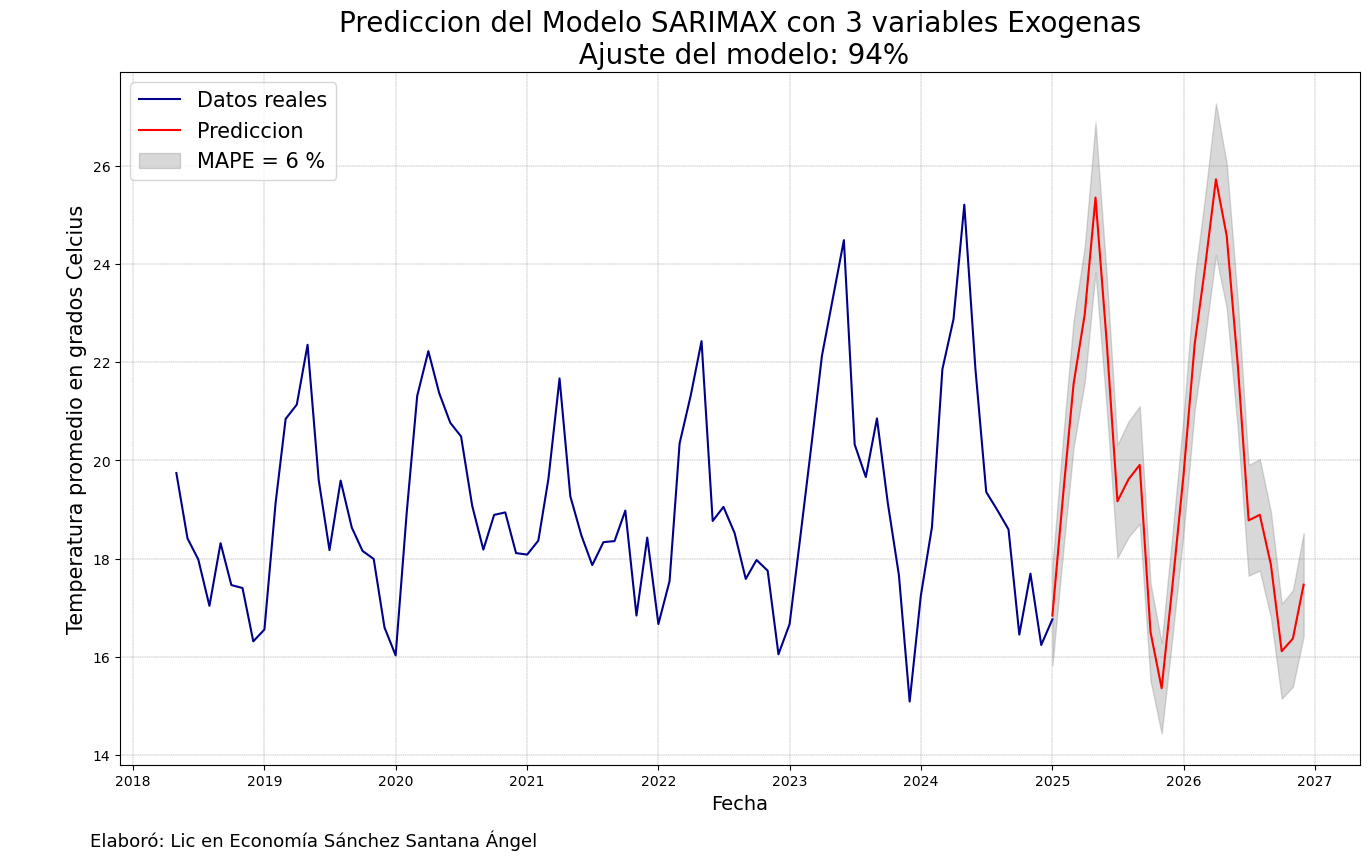

In [708]:
# Graficar las predicciones y los intervalos de predicción
plt.figure(figsize=(16, 9))
plt.plot(Data['TAVG(Celsius)'].tail(80), label='Datos reales', color = 'darkblue')
plt.plot(Resultados['predicted_mean_combined'], color='r', label='Prediccion')
plt.fill_between(Resultados.index, Resultados['TAVG(Celsius)_minus_6%'], Resultados['TAVG(Celsius)_plus_6%'], color='gray', alpha=0.3, label='MAPE = 6 %')
plt.xlabel('Fecha', size = 14)
plt.ylabel('Temperatura promedio en grados Celcius', size = 15)
plt.title('Prediccion del Modelo SARIMAX con 3 variables Exogenas\n Ajuste del modelo: 94%', size = 20)
plt.grid(color = 'gray', linestyle = '--', linewidth=0.3 )
plt.legend(loc='upper left', fontsize = 15)
plt.text( 0.05, 0.01, 'Elaboró: Lic en Economía Sánchez Santana Ángel', va='bottom', transform=fig.transFigure, size = 13)
plt.show()